In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset (replace 'maternal_health_data.csv' with the actual file path)
data = pd.read_csv('Maternal_Health_Risk_Data_ Set.csv')

# Check the first few rows of the data
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Example: Dropping rows with missing values
data.dropna(inplace=True)

# Splitting features and target variable
y = data['RiskLevel']
X = data.drop(['RiskLevel'], axis=1)  # Assuming 'RiskLevel' is the target column

Missing values:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

Model Accuracy: 0.7967213114754098

Classification Report:
               precision    recall  f1-score   support

   high risk       0.83      0.91      0.87        76
    low risk       0.83      0.74      0.78       117
    mid risk       0.74      0.78      0.76       112

    accuracy                           0.80       305
   macro avg       0.80      0.81      0.80       305
weighted avg       0.80      0.80      0.80       305



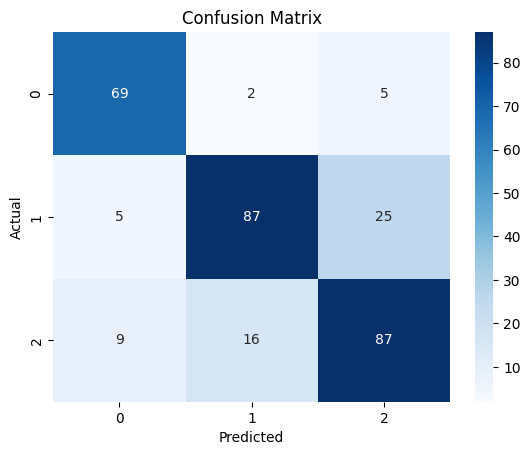

In [5]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


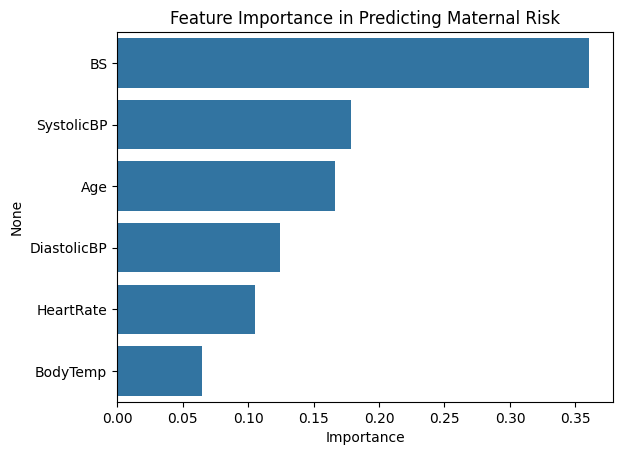

In [6]:
# Feature importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Importance")
plt.title("Feature Importance in Predicting Maternal Risk")
plt.show()


In [7]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [11]:
import gradio as gr
def predict_risk(age, systolic_bp, diastolic_bp, blood_glucose, body_temp, heart_rate):
    # Create input data as DataFrame
    input_data = pd.DataFrame([[age, systolic_bp, diastolic_bp, blood_glucose, body_temp, heart_rate]],
                              columns=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])

    # Make a prediction
    risk_prediction = clf.predict(input_data)[0]

    # Interpret the prediction
    if risk_prediction == 'high':
        return "High Risk"
    elif risk_prediction == 'mid':
        return "Mid Risk"
    else:
        return "Low Risk"

# Gradio input fields
inputs = [
    gr.Number(label="Age"),
    gr.Number(label="Systolic Blood Pressure (mmHg)"),
    gr.Number(label="Diastolic Blood Pressure (mmHg)"),
    gr.Number(label="Blood Glucose Level (mmol/L)"),
    gr.Number(label="Body Temperature (°F)"),
    gr.Number(label="Heart Rate (bpm)")
]

# Gradio output field
output = gr.Textbox(label="Maternity Risk Level")

# Launch the Gradio app
app = gr.Interface(
    fn=predict_risk,
    inputs=inputs,
    outputs=output,
    title="Maternity Mortality Risk Prediction",
    description="Enter patient details to assess the maternity risk level."
)

app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dc44d921ddbf8e4d73.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
